In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Disha Sharma\Desktop\XAI\bike-sharing-dataset\day.csv")

In [7]:
#selecting features
df = df[['cnt', 'season', 'holiday', 'workingday',
         'weathersit', 'temp', 'hum', 'windspeed']]

In [53]:
df['cnt_2d_bfr'] = df['cnt'].shift(2)

In [55]:
df = df.dropna()

In [57]:
y = df['cnt']
X = df.drop(columns=['cnt'])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [79]:
tree = DecisionTreeRegressor(
    max_depth=5,
    
    random_state=42
)

tree.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

In [81]:
y_pred = tree.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))

R2 score: 0.6713773411535173


In [83]:
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 1067.9815002147845


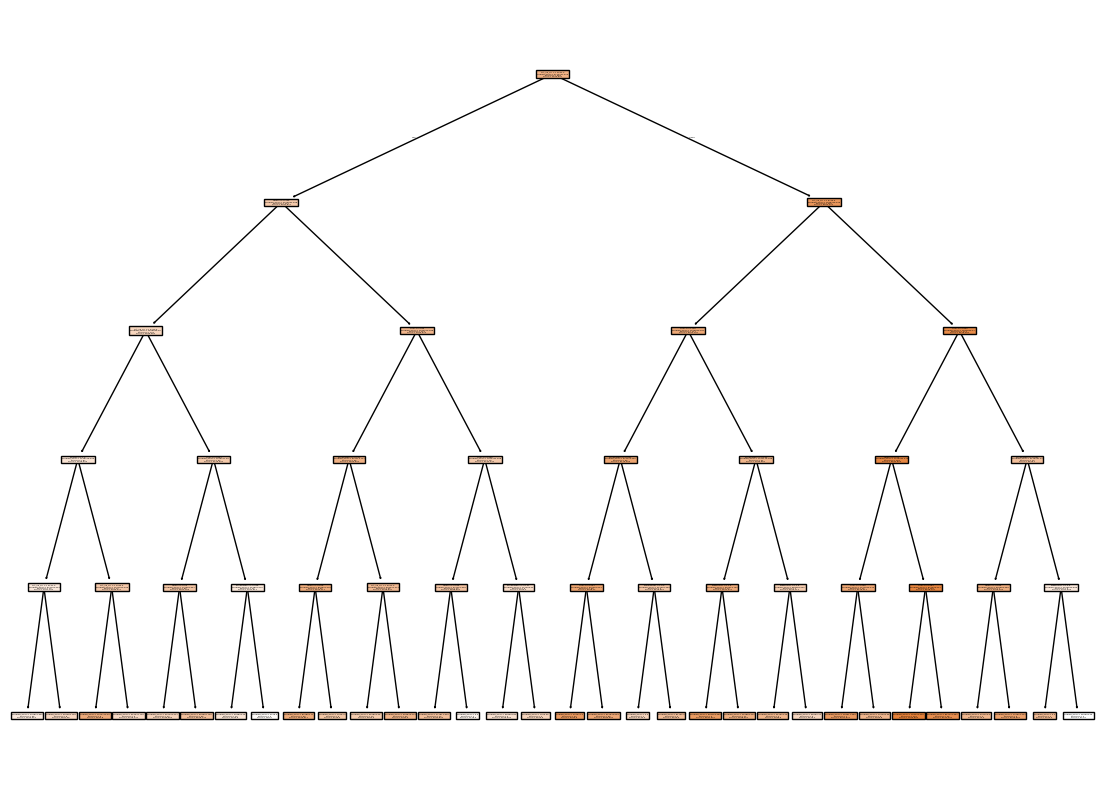

In [85]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14,10))
plot_tree(tree,
          feature_names=X.columns,
          filled=True)
plt.show()

In [86]:
from sklearn.tree import export_text

rules = export_text(tree, feature_names=list(X.columns))
print(rules)

|--- cnt_2d_bfr <= 4632.00
|   |--- temp <= 0.44
|   |   |--- cnt_2d_bfr <= 2423.50
|   |   |   |--- season <= 1.50
|   |   |   |   |--- cnt_2d_bfr <= 2151.00
|   |   |   |   |   |--- value: [1602.02]
|   |   |   |   |--- cnt_2d_bfr >  2151.00
|   |   |   |   |   |--- value: [2567.25]
|   |   |   |--- season >  1.50
|   |   |   |   |--- cnt_2d_bfr <= 1295.50
|   |   |   |   |   |--- value: [4894.80]
|   |   |   |   |--- cnt_2d_bfr >  1295.50
|   |   |   |   |   |--- value: [2465.44]
|   |   |--- cnt_2d_bfr >  2423.50
|   |   |   |--- hum <= 0.80
|   |   |   |   |--- temp <= 0.28
|   |   |   |   |   |--- value: [2796.96]
|   |   |   |   |--- temp >  0.28
|   |   |   |   |   |--- value: [3808.14]
|   |   |   |--- hum >  0.80
|   |   |   |   |--- windspeed <= 0.26
|   |   |   |   |   |--- value: [1923.50]
|   |   |   |   |--- windspeed >  0.26
|   |   |   |   |   |--- value: [750.00]
|   |--- temp >  0.44
|   |   |--- hum <= 0.83
|   |   |   |--- windspeed <= 0.21
|   |   |   |   |--- tem

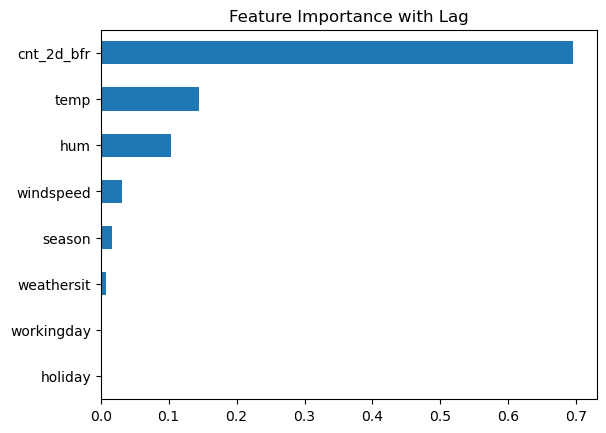

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(
    tree.feature_importances_,
    index=X.columns
).sort_values()

importance.plot(kind='barh')
plt.title("Feature Importance with Lag")
plt.show()

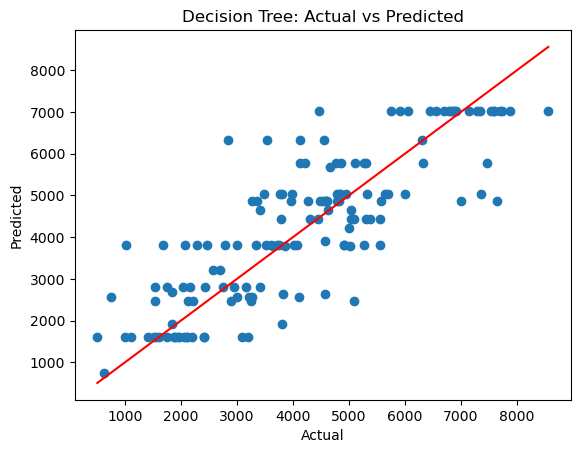

In [95]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()